Задание
Цель: изучить применение дерева решений в рамках задачи регрессии
Описание задания:
В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.
Этапы работы:

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проведите первичный анализ.
    a.Проверьте данные на пропуски. Удалите в случае обнаружения.
    b.*Нормализуйте один из признаков.
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Обучите модель регрессии на обучающем множестве.
5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.
6. Обучите дерево решений на обучающем множестве.
    a. Повторите п. 5 для полученной модели.
    b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.
7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
    a. Повторите п. 5 для полученной модели.
8. Сформулируйте выводы по проделанной работе.
    a. Сравните точность двух моделей.
    b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?
Для получения зачета по этому домашнему заданию, должно быть как минимум реализовано обучение двух моделей, выведена их точность, оптимизирован один параметр дерева решений.
Результат: получены знания по работе с деревом решений

In [48]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')
mpl.rcParams['figure.dpi'] = 80

In [24]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [25]:
house_data = fetch_california_housing(as_frame=True)

In [26]:
house_data

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [27]:
data = pd.DataFrame(house_data.frame)
list(house_data.target_names)

['MedHouseVal']

In [28]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Нормализуем признаки

In [30]:
scaler = preprocessing.MinMaxScaler()

In [31]:
names = data.columns

In [32]:
d = scaler.fit_transform(data)

In [33]:
house_df = pd.DataFrame(d, columns=names)

In [34]:
house_df.drop('MedHouseVal', axis=1, inplace=True)
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163


In [35]:
y = data['MedHouseVal']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(house_df, y, test_size=0.2, random_state=42)

In [37]:
model = LinearRegression()

In [38]:
model.fit(X_train, y_train)

LinearRegression()

In [77]:
score_1 = model.score(X_test, y_test)
score_1

0.5757877060324511

In [40]:
model_tree = DecisionTreeRegressor()

In [41]:
model_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [79]:
score_2 = model_tree.score(X_test, y_test)
score_2

0.6195256461300784

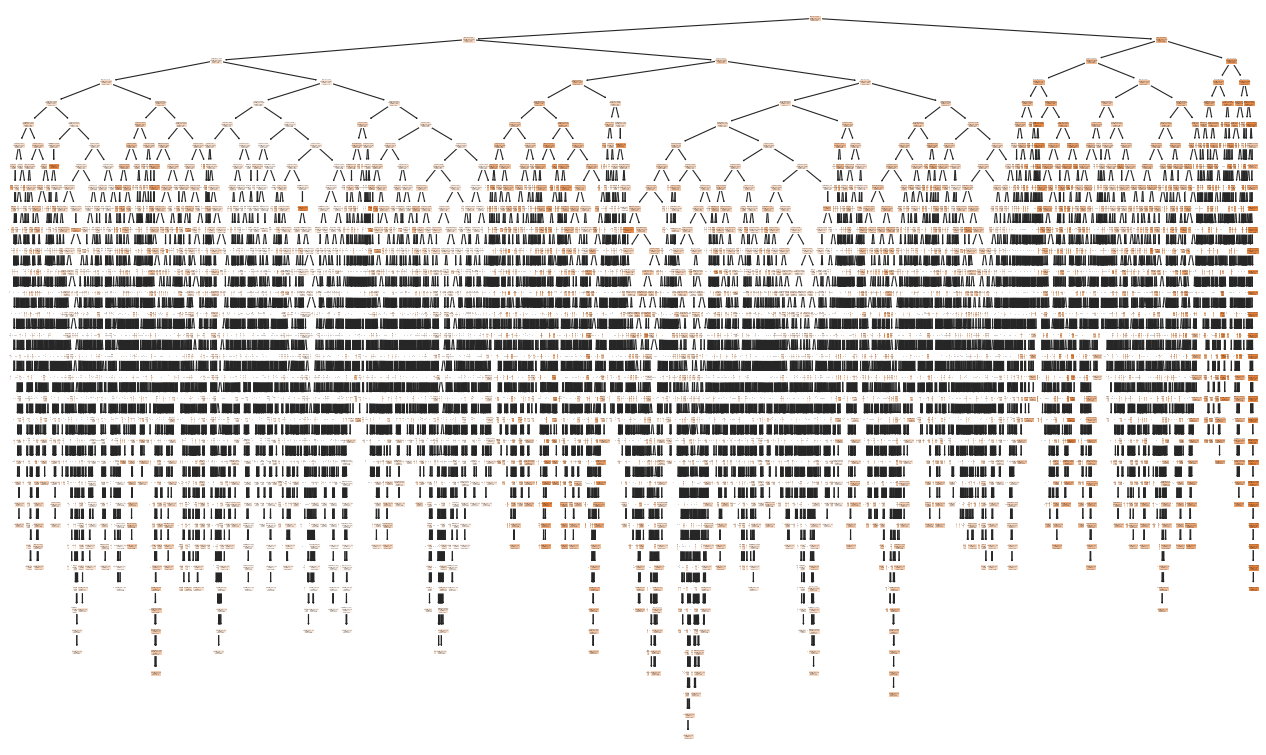

In [43]:
plt.figure(figsize=(20, 12))
plot_tree(model_tree, feature_names=house_df.columns, filled=True);

График не читаем, улучшим. 

In [44]:
new_model = DecisionTreeRegressor(min_samples_leaf=2, max_depth=3, random_state=42)

In [45]:
new_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=2, random_state=42)

In [81]:
score_3 = new_model.score(X_test, y_test)
score_3

0.5097688574855119

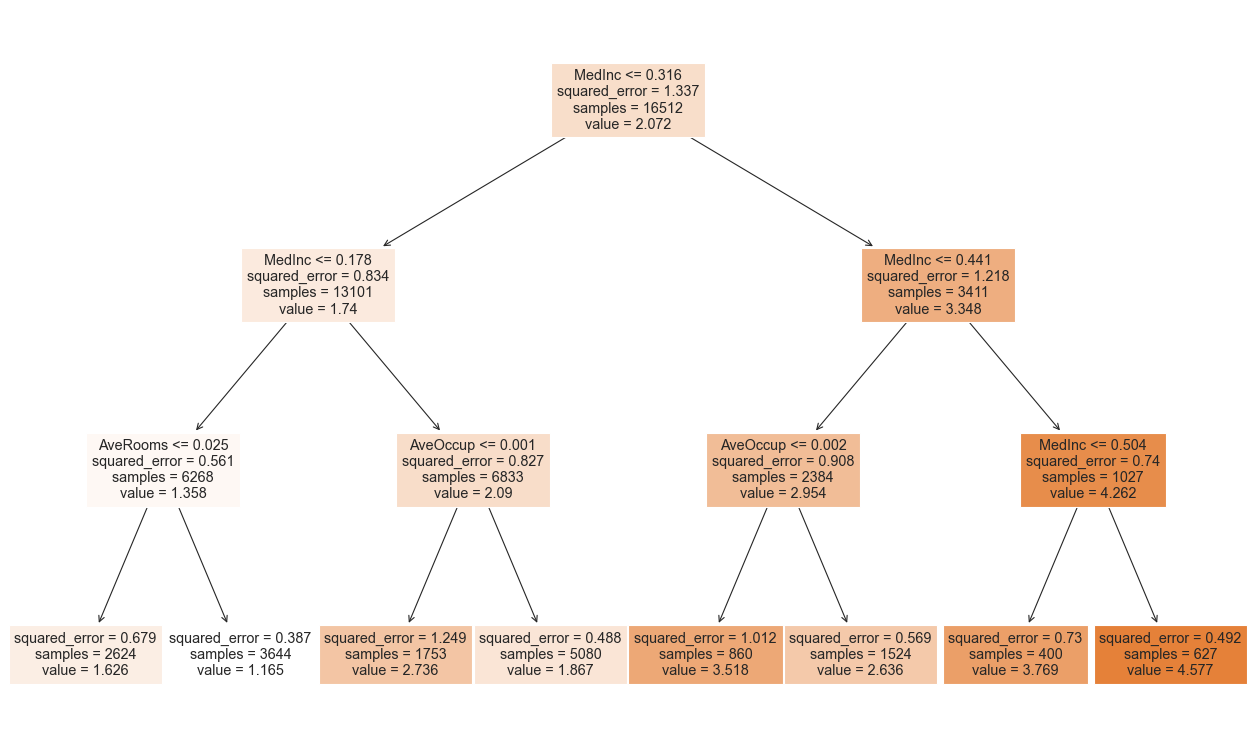

In [47]:
plt.figure(figsize=(20, 12))
plot_tree(new_model, feature_names=house_df.columns, filled=True);

Качество модели сильно ухудшилось, попробуем другие параметры

In [54]:
new_model2 = DecisionTreeRegressor(min_samples_leaf=10, max_depth=4, random_state=42)

In [55]:
new_model2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)

In [83]:
score_4 = new_model2.score(X_test, y_test)
score_4

0.5540365263611904

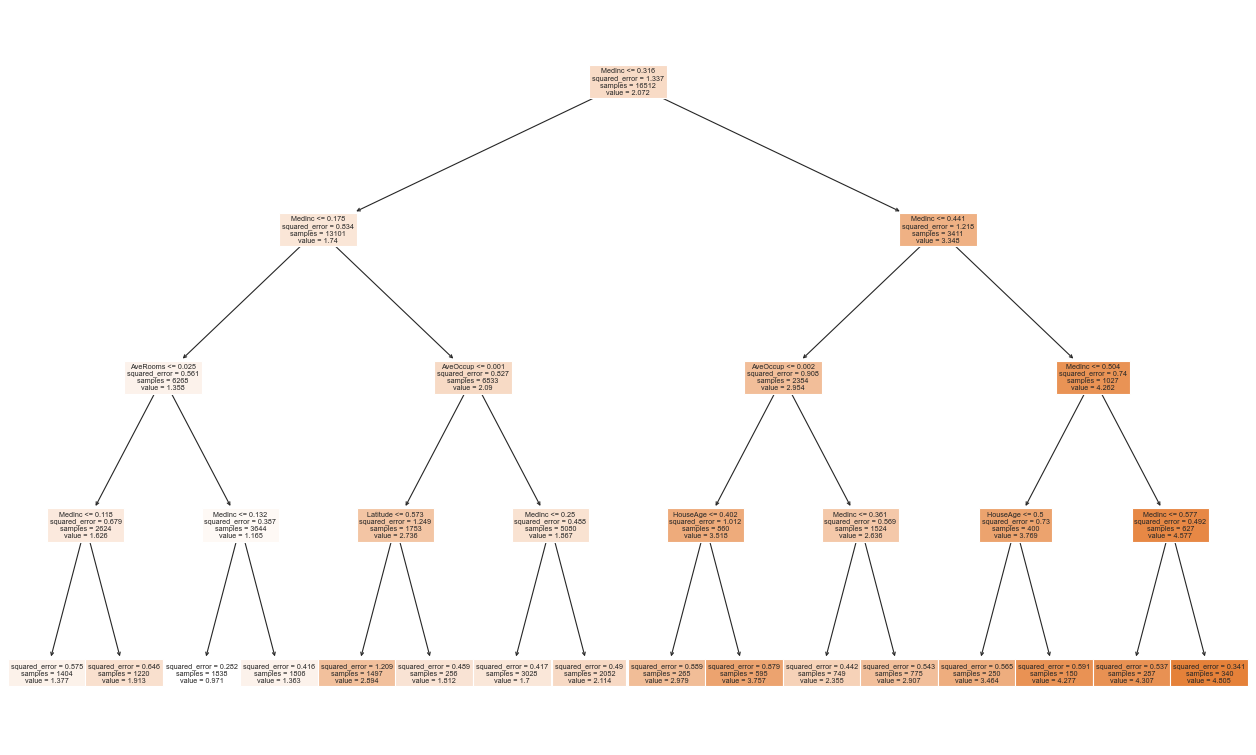

In [57]:
plt.figure(figsize=(20, 12))
plot_tree(new_model2, feature_names=house_df.columns, filled=True);

In [58]:
new_model3 = DecisionTreeRegressor(min_samples_leaf=4, max_depth=8, random_state=42)

In [59]:
new_model3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, random_state=42)

In [82]:
score_5 = new_model3.score(X_test, y_test)
score_5

0.6814567549562465

При увеличении глубины, модель значительно улучшилась, попробуем увеличь глубину и количество листов

In [73]:
new_model4 = DecisionTreeRegressor(min_samples_leaf=8, max_depth=20, random_state=42)

In [74]:
new_model4.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=8, random_state=42)

In [84]:
score_6 = new_model4.score(X_test, y_test)
score_6

0.7180876191021216

In [86]:
result = pd.DataFrame()
result['Model'] = ['Liner_model', 'Tree_1', 'Tree_2', 'Tree_3', 'Tree_4', 'Tree_5']
result['Score'] = [score_1, score_2, score_3, score_4, score_5, score_6]
result['Description'] = ['Линейная регрессия', 'Дерево решений на всей выборке', 'Дерево решений: 2 листа, 3 глубина', 'Дерево решений: 10 листов, 4 глубина', 'Дерево решений: 4 листа, 8 глубина', 'Дерево решений: 8 листов, 20 глубина']
result

,Model,Score,Description
0,Liner_model,0.575788,Линейная регрессия
1,Tree_1,0.619526,Дерево решений на всей выборке
2,Tree_2,0.509769,"Дерево решений: 2 листа, 3 глубина"
3,Tree_3,0.554037,"Дерево решений: 10 листов, 4 глубина"
4,Tree_4,0.681457,"Дерево решений: 4 листа, 8 глубина"
5,Tree_5,0.718088,"Дерево решений: 8 листов, 20 глубина"


Данные, полученные в результате работы, показывают что дерево решений показывает лучший результат чем модель линейной регрессии, но не очень большие показатели в Tree_1 свидетельствуют о переобучении модели. В моделях Tree_2 и Tree_3 явно модель недообучилась, из-за чего показатели ухудшились. В эксперименте Tree_4 и Tree_5 заметно явное улучшение модели, но мы приближаемся к тому моменту, когда модель может переобучиться. 